# Final Project Presentation - Team JAR

### Definition of "Bestness" 

For our project, we defined "Bestness" as the place that would be the most pleasant and the safest area to live.  The neighborhood that we would consider best is one that we will feel comfortable living in. For our project, we analyzed three different factors in order to conclude what the best neighborhood is in Pittsburgh.  Initially, our approach was to analyze the neighborhoods based off of the income of its residents and its crime rates.  After looking into different data bases, none of the income data sufficiently matched what we were looking for so we decided to analyze the amount of trash (in tons) that is dumped in each neighborhood as well as its crime rates.

### Metric 

The metric that we used to measured "bestness" of the Pittsburgh Neighborhoods is the number (in tons) of trash at illegal dump sites, the number of non-traffic police citations, and crime incident data from the Police Incident Blotter archive.  Our ideal neighborhood would have the least amount of trash and the lowest crime rate.  We analyzed the number of times each neighborhood was found in the datasite and compared to find the lowest.

### The Best Neighborhood 

To determine the best neighborhood, we began to analyze our data. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd;
import seaborn as sns
import matplotlib as mpl;

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
dump_site = pd.read_csv("https://data.wprdc.org/dataset/ed4cf849-d323-4d01-8a13-675d283f1ac9/resource/ee834d8d-ae71-4b3b-b02b-312ba321ff17/download/illegaldumpsites.csv")
dump = dump_site.loc[dump_site['City'] == 'Pittsburgh']
dump2 = dump.loc[dump['Neighborhood']!= 'Beltzhoover']
dump2.head(30)

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN
5,222 Walter Street,Completed,Pittsburgh,Allentown,5,dump is in deteriorated garage,40.42022451,-79.99477699,NaN
6,Grimes and Elsinburg,Completed,Pittsburgh,Allentown,0.3,"residential street, across the street from a s...",40.41544068,-79.99297857,NaN
7,Parkwood Road Site 1,Surveyed,Pittsburgh,Arlington,3,NaN,40.41068203,-79.96578013,NaN
8,Parkwood Road Site 2,Surveyed,Pittsburgh,Arlington,4,NaN,40.41144932,-79.96714085,NaN
9,Parkwood Road Site 3,Completed,Pittsburgh,Arlington,2.5,NaN,40.41397095,-79.97727203,NaN


These are all of the **Pittsburgh** neighborhoods included in our dataset that track the amount of trash dumped.  We removed any other cities from Pittsburgh since the point of the project is to analyze Pittsburgh neighborhoods and so that it would better match up with the two other datasets we analyzed.

In [4]:
dumps = dump2.drop(['site_name', 'City', 'location_description','latitude', 'longitude', 'Status'], axis=1)
newdata = dumps.iloc[:,0:2]
newdata['estimated_tons'] = newdata['estimated_tons'].astype(float)
new = newdata.groupby('Neighborhood', as_index = False).sum()
new.head(79)

,Neighborhood,estimated_tons
0,Allentown,10.4
1,Arlington,17.5
2,Banksville,1.0
3,Bedford Dwellings,1.0
4,Beechview,11.0
5,Bloomfield,5.0
6,Bluff,1.0
7,Borough of Millvale,1.0
8,Brighton Heights,6.8
9,Brookline,35.7


Our first step was step was to remove all of the columns that were not necessary for our analysis.  After doing this, we were left with the neighborhood and its estimated trash in tons.  As you can see below, we were analyzing 78 neighborhoods.

In [5]:
new['Neighborhood'].unique()
len(new['Neighborhood'].unique())

78

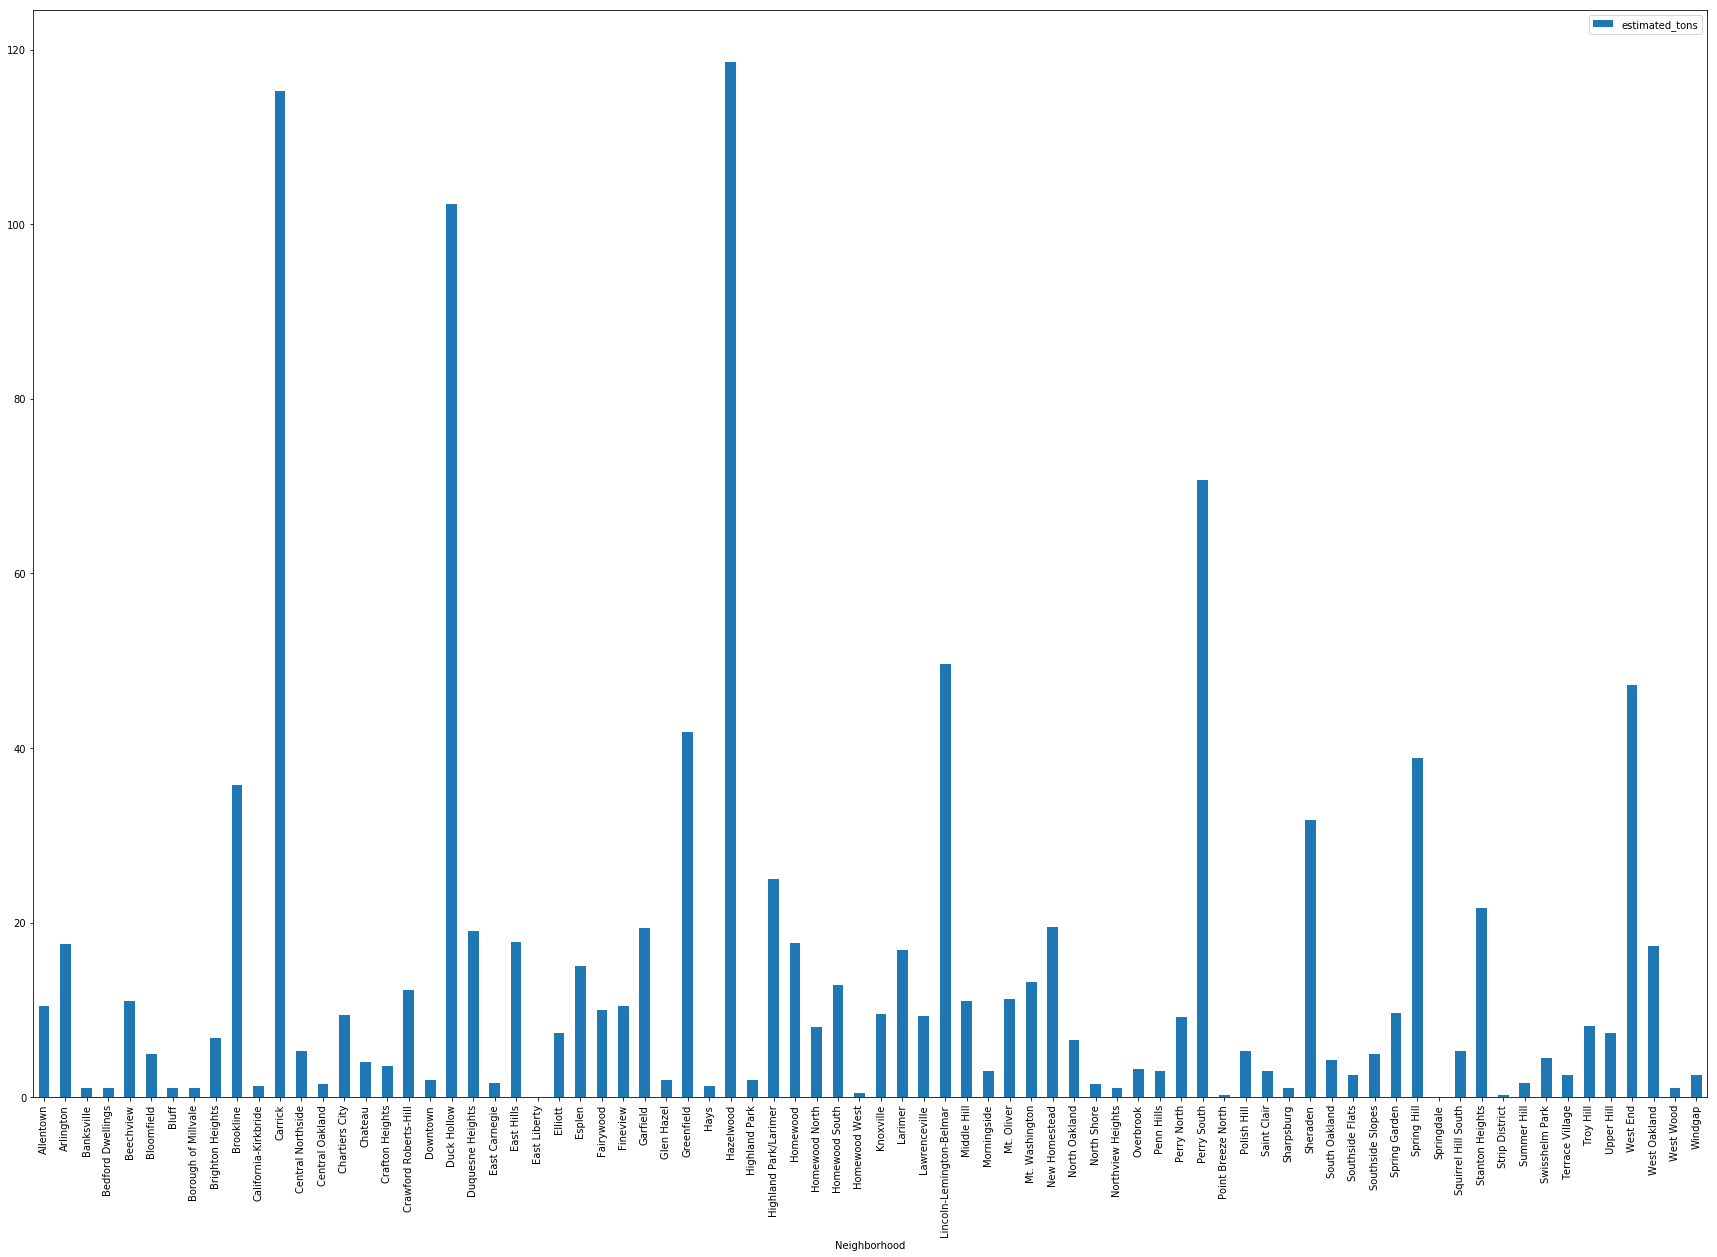

In [6]:
new.plot(x='Neighborhood', kind='bar', rot=90, figsize = (30,20))

This is a bar graph of all of the Pittsburgh neighborhoods and their levels of trash.

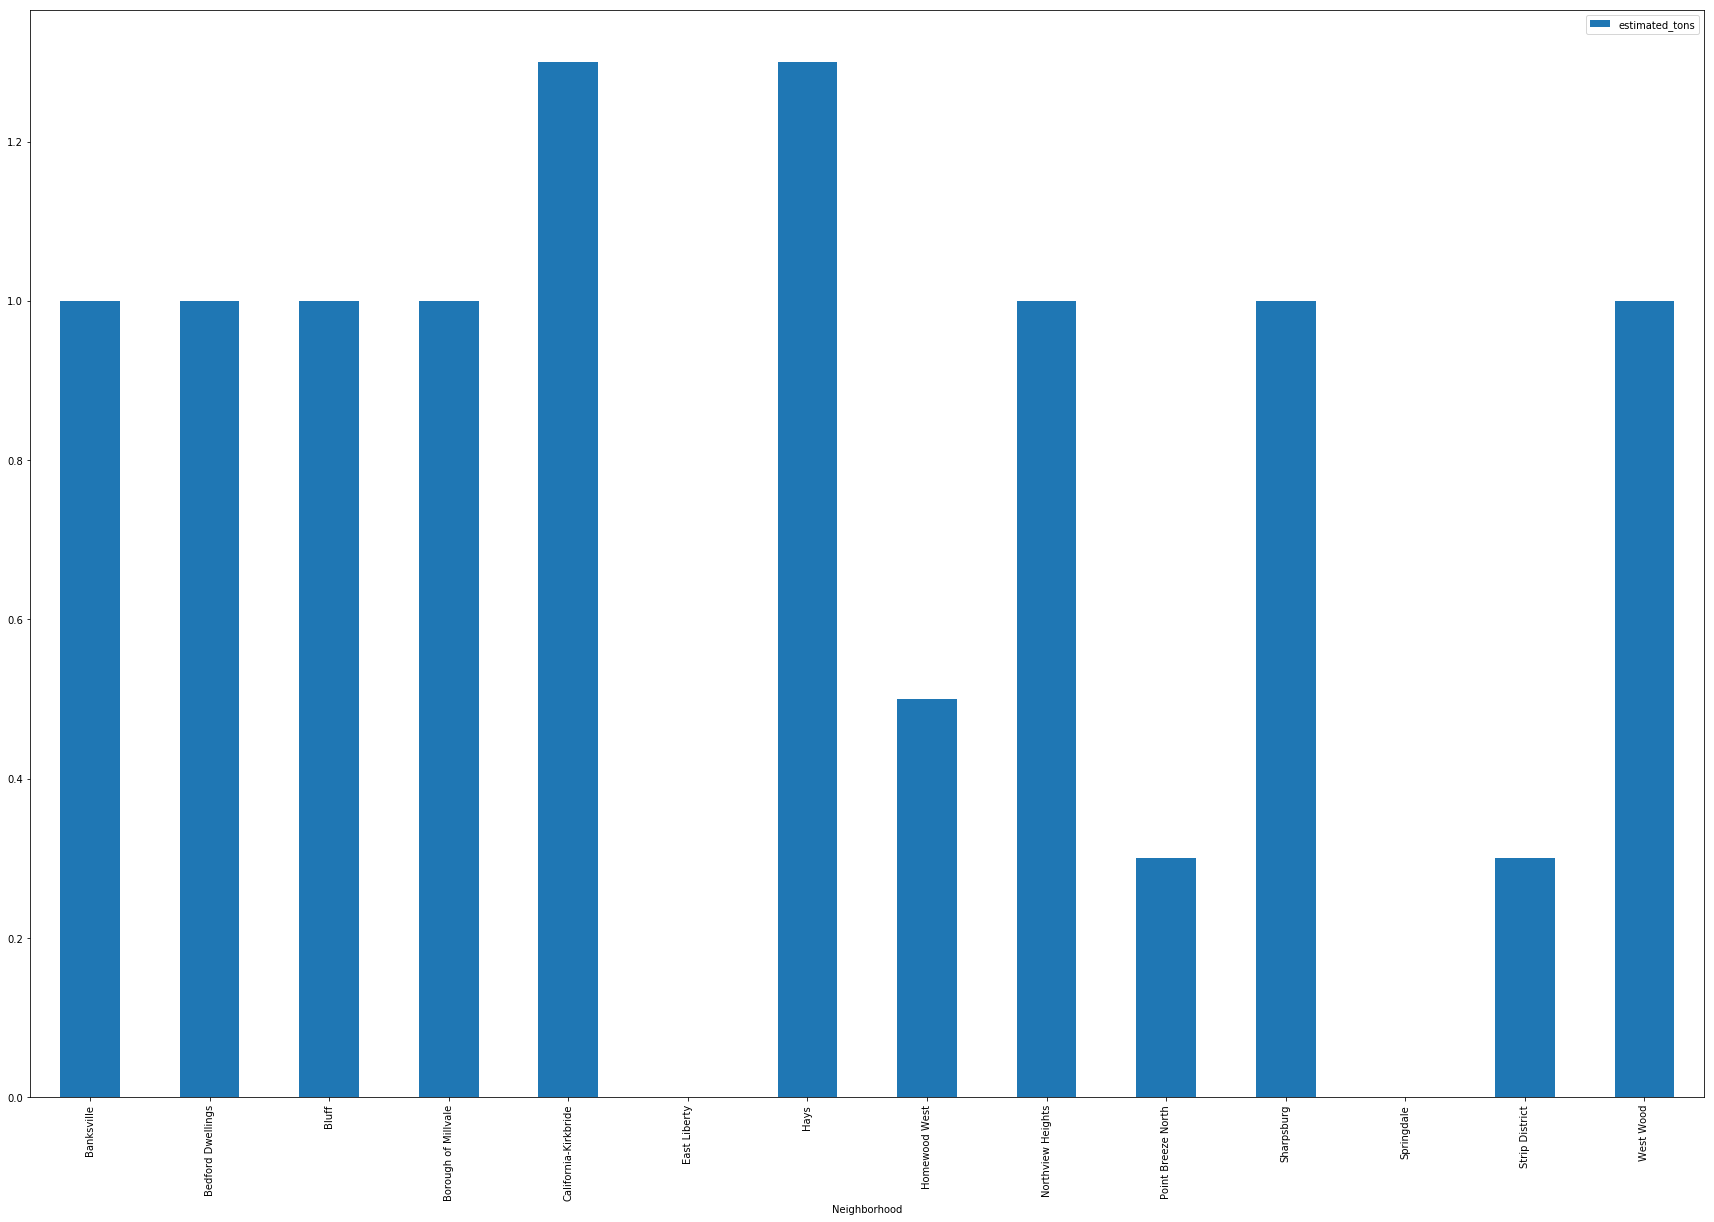

In [7]:
short = new.loc[new['estimated_tons'] < 1.5]
short.plot(x='Neighborhood', kind='bar', rot=90, figsize = (30,20))

To narrow down the search for the best neighborhood, we created another bar graph that only included neighborhoods with less than 1.5 estimated tons of trash.

In [8]:
short['Neighborhood'].unique()
len(short['Neighborhood'].unique())

14

These left us with our top choices for the "best" neighborhood.

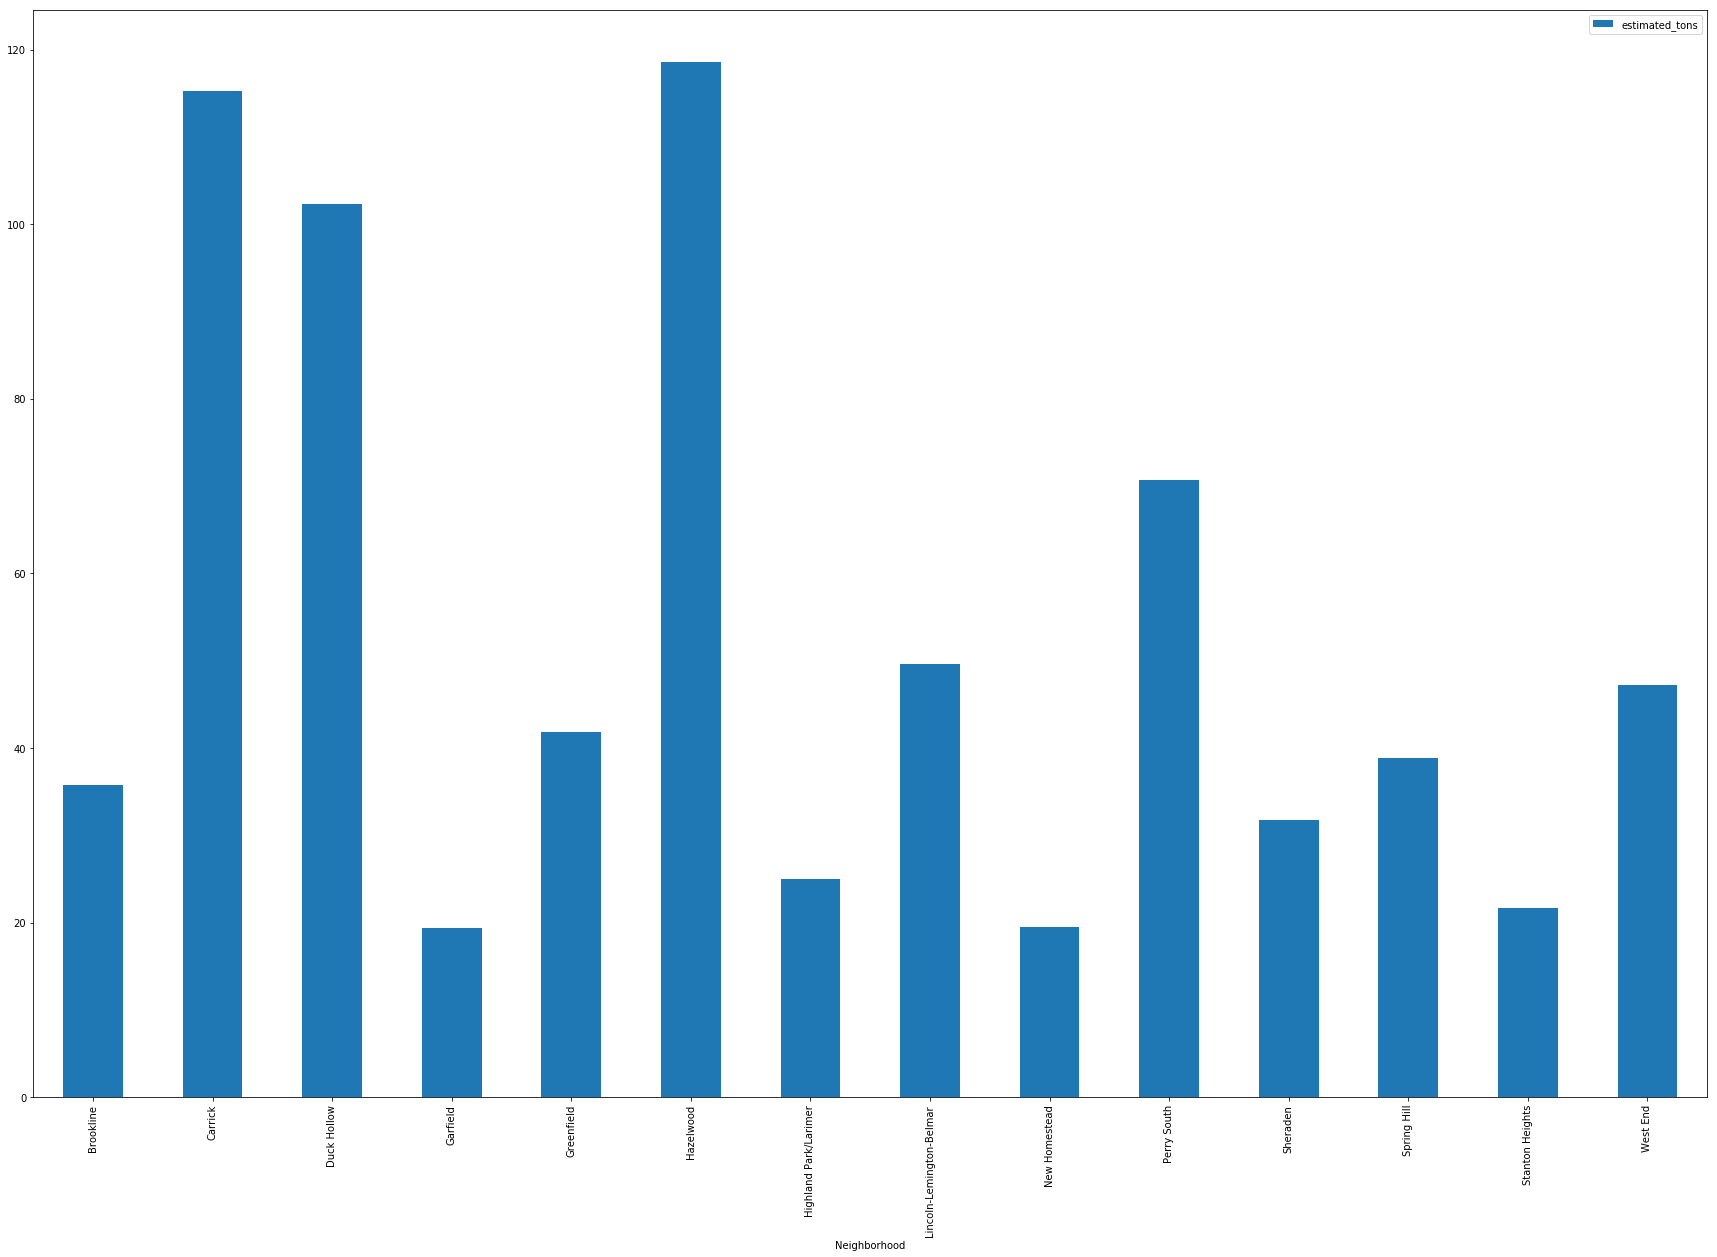

In [9]:
long = new.loc[new['estimated_tons'] > 19]
long.plot(x='Neighborhood', kind='bar', rot=90, figsize = (30,20))

The neighborhoods included in the graph above have over 19 tons of trash at their dump sites so these were eliminated from our search for the best neighborhood.

In [10]:
long['Neighborhood'].unique()
len(long['Neighborhood'].unique())

14

In [11]:
long.sort_values("estimated_tons", ascending=False).head

<bound method NDFrame.head of                 Neighborhood  estimated_tons
32                 Hazelwood           118.6
11                   Carrick           115.3
19               Duck Hollow           102.3
54               Perry South            70.7
42  Lincoln-Lemington-Belmar            49.6
74                  West End            47.2
30                Greenfield            41.8
64               Spring Hill            38.8
9                  Brookline            35.7
59                  Sheraden            31.8
34     Highland Park/Larimer            25.0
67           Stanton Heights            21.7
47             New Homestead            19.5
28                  Garfield            19.4>

These are the neighborhoods that we have considered some of the "worst" based off of the amount of trash dumped.  They are ranked in order of highest estimated tons of trash.

In [12]:
short.sort_values("estimated_tons", ascending=True).head

<bound method NDFrame.head of             Neighborhood  estimated_tons
23          East Liberty             0.0
65            Springdale             0.0
55    Point Breeze North             0.3
68        Strip District             0.3
38         Homewood West             0.5
2             Banksville             1.0
3      Bedford Dwellings             1.0
6                  Bluff             1.0
7    Borough of Millvale             1.0
50     Northview Heights             1.0
58            Sharpsburg             1.0
76             West Wood             1.0
10  California-Kirkbride             1.3
31                  Hays             1.3>

These are the neighborhoods that we have concluded as "best" in terms of the amount of trash that they have in tons ranked in order from least to most. We will come back to this list after analyzing the next two datasets to choose what neighborhood is the best choice.

In [13]:
police_df = pd.read_csv('archive-police-blotter.zip', low_memory=False)
citations_df = pd.read_csv('citations.csv')

In [14]:
joined_df_police = police_df.groupby('INCIDENTNEIGHBORHOOD', as_index=False).count();
joined_df_citations = citations_df.groupby('NEIGHBORHOOD', as_index=False).count();

<BarContainer object of 94 artists>

<Figure size 432x288 with 0 Axes>

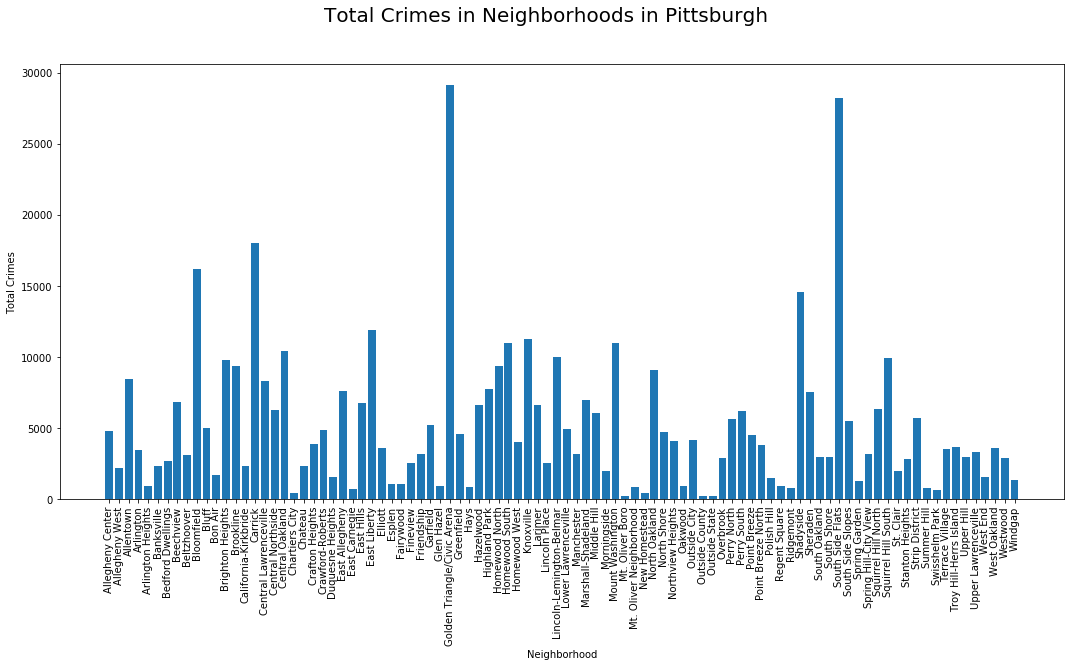

In [15]:
new_df = joined_df_police.iloc[:,0:2];
x_data = pd.Series(new_df.iloc[:,0]);
y_data = pd.Series(new_df.iloc[:,1]);

fig = plt.figure()

plt.figure(figsize=(18, 8))
plt.xticks(rotation=90)
plt.suptitle('Total Crimes in Neighborhoods in Pittsburgh', fontsize=20)
plt.ylabel('Total Crimes')
plt.xlabel('Neighborhood')

plt.bar(x_data,y_data)

The above bar graph shows the total crimes in each neighborhood in Pittsburgh that was included in the Police Blotter Dataset.

By looking at the graph, it is clear that the neighborhoods with the lowest crime rates are Arlington Heights, Chartiers City, East Carnegie, Espien, Fairywood, Glenhazel, Hays, Mt. Oliver Boro, Outside County, Outside State, Regent Square, Ridgemont, Summer Hill, and Swisshelm Park.

<BarContainer object of 95 artists>

<Figure size 432x288 with 0 Axes>

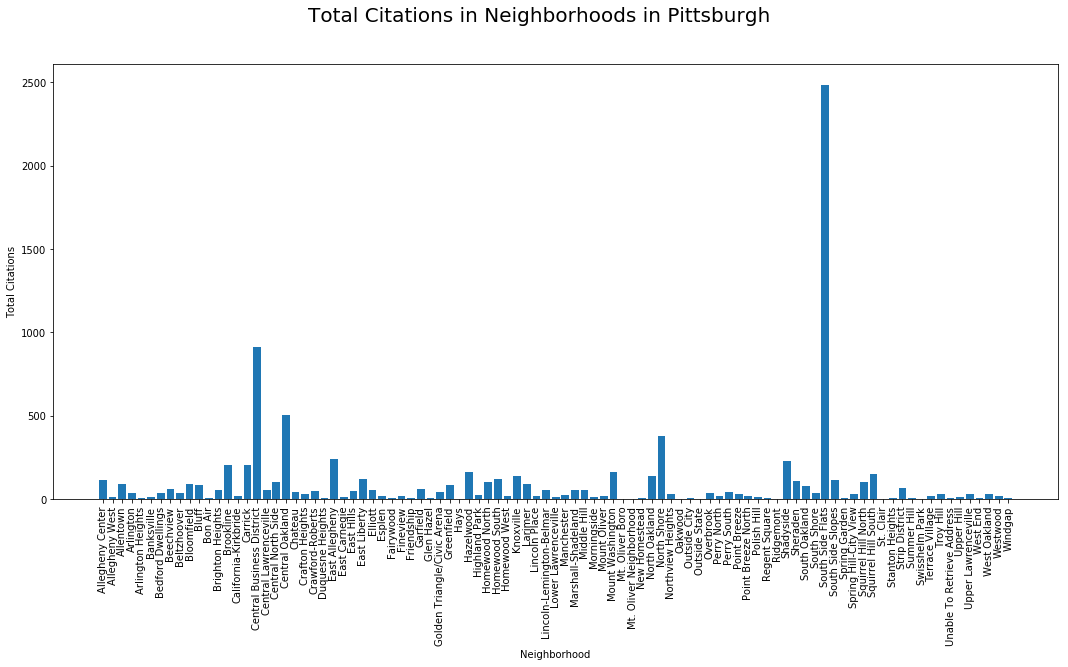

In [16]:
new_df2 = joined_df_citations.iloc[:,0:2];
x_data = pd.Series(new_df2.iloc[:,0]);
y_data = pd.Series(new_df2.iloc[:,1]);

fig = plt.figure()

plt.figure(figsize=(18, 8))
plt.xticks(rotation=90)
plt.suptitle('Total Citations in Neighborhoods in Pittsburgh', fontsize=20)
plt.ylabel('Total Citations')
plt.xlabel('Neighborhood')

plt.bar(x_data,y_data)

The above bar graph shows the total citations in each neighborhood from the Citations Dataset.

The neighborhoods with the lowest amount of citations were Hays, Mt. Oliver Boro, Outside State, Oakwood, St. Clair, and Swisshelm Park.

### Conclusion 

When comparing the "best" neighborhoods from the three datasets, we looked at which neighborhood repeated throughout each dataset as having one of the lowest amounts of that criteria (either crime rates, citations, or trash).  The Pittsburgh neighborhood **Hays** appears on all three datasets for having one of the lowest amounts of trash, crime rate, and police citations.  Although it did not rank with the absolute lowest amount of each criteria, it was the first neighborhood to repeat among the datasets when in ascending order so it is the **"best"**.